**Created on 11/01/2023**

**Authors: Thomas ROSTAINGT**

**License: this code is released under the CeCILL 2.1 license. See https://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt**

## Libraries

In [13]:
import os
import sys
import math
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb

In [2]:
sns.set_style('darkgrid')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data import

In [14]:
train = pd.read_csv('/content/drive/MyDrive/M2 SID/PIP2023/SEPARATION DONNEES/V2/train_complet_10.csv')
test = pd.read_csv('/content/drive/MyDrive/M2 SID/PIP2023/SEPARATION DONNEES/V2/test_complet_10.csv')

In [15]:
Y_train = train[['loc_initiator_x', 'loc_initiator_y']]
X_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

Y_test = test[['loc_initiator_x', 'loc_initiator_y']]
X_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

## Predict

In [16]:
MOR = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X_train, Y_train)
pred_test = MOR.predict(X_test)
#pred_val = MOR.predict(X_val)

## Score

In [17]:
def score_distanceM(Xobserve:float, Yobserve:float, Xprevu:float, Yprevu:float) -> float:
    X=(Xobserve-Xprevu)**2
    Y=(Yobserve-Yprevu)**2
    return np.mean(np.sqrt(X+Y))

In [21]:
print("mae test : ", mean_absolute_error(Y_test, pred_test))
print("rmse test : ", np.sqrt(mean_squared_error(Y_test,pred_test)))

print("score distance test : ",
      score_distanceM(Xobserve = Y_test['loc_initiator_x'],
                      Yobserve = Y_test['loc_initiator_y'],
                      Xprevu = pred_test[:,0],
                      Yprevu = pred_test[:,1]))

mae test :  2.633934316155469
rmse test :  3.152915507587994
score distance test :  4.167472356552565


## Explicability of the model

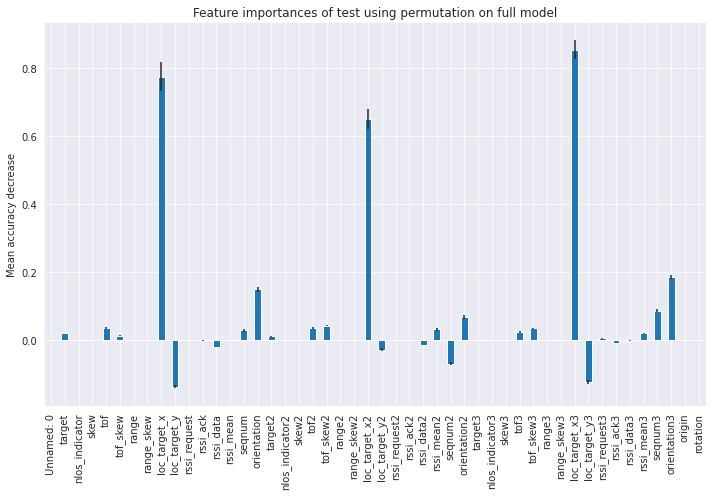

In [20]:
result = permutation_importance(MOR, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=list(X_train.columns))

fig, ax = plt.subplots(figsize=(10, 7))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances of test using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

**Remarque** : la variable loc_target_x des trois capteurs ont une forte influence sur la prédiction des coordonnées du capteur 183.